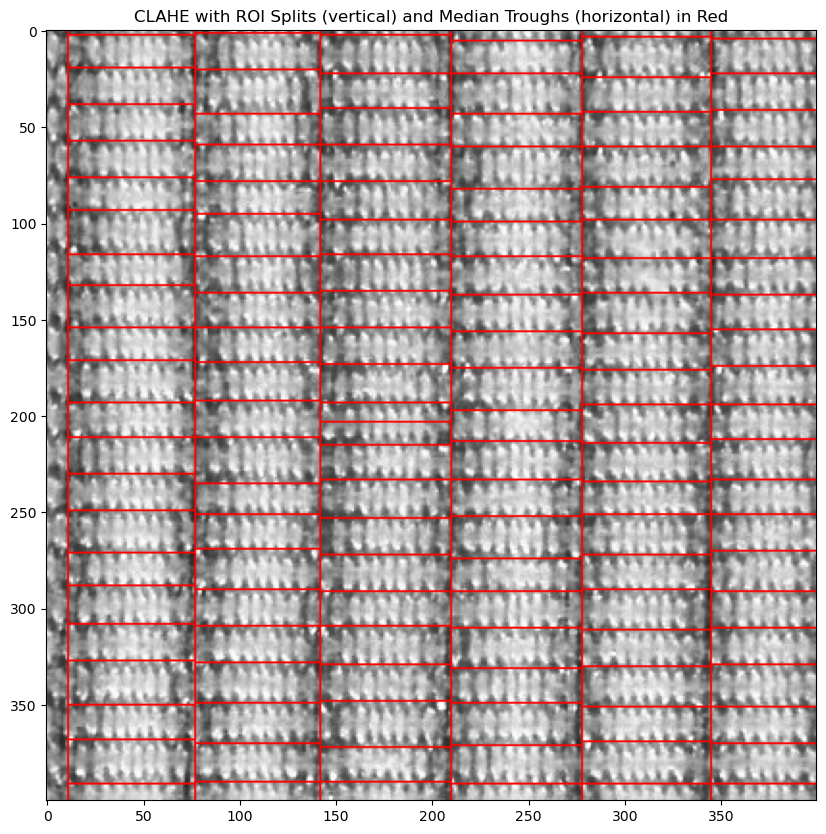

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read and crop the image
img = cv2.imread('../image/img_03.tif')[200:600, 200:600]
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_gray)

column_means_clahe = np.mean(img_clahe, axis=0)
# Find troughs for splitting (as peaks of the negative signal), only where value < 155
split_troughs, _ = find_peaks(-column_means_clahe, prominence=5, distance=10, height=-155)
split_troughs = np.sort(split_troughs)

if len(split_troughs) == 0:
    print("No troughs found, cannot split image.")
else:
    first_trough = split_troughs[0]
    split_indices = [first_trough] + split_troughs[split_troughs > first_trough].tolist() + [img_clahe.shape[1]]

    # Convert CLAHE image to color for drawing colored lines
    img_clahe_color = cv2.cvtColor(img_clahe, cv2.COLOR_GRAY2BGR)

    # Draw vertical red lines at the split columns
    for col in split_indices[:-1]:  # Don't draw at the last column (right edge)
        cv2.line(img_clahe_color, (col, 0), (col, img_clahe_color.shape[0] - 1), (0, 0, 255), 1)

    for i in range(len(split_indices) - 1):
        left = split_indices[i]
        right = split_indices[i + 1]
        roi = img_clahe[:, left:right]
        row_medians = np.median(roi, axis=1)
        # Find troughs in median for this ROI
        median_troughs, _ = find_peaks(-row_medians, prominence=5, distance=10, height=-155)

        # Draw horizontal red lines at these rows (across the width of the ROI)
        for row in median_troughs:
            cv2.line(img_clahe_color, (left, row), (right-1, row), (0, 0, 255), 1)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img_clahe_color, cv2.COLOR_BGR2RGB))
    plt.title("CLAHE with ROI Splits (vertical) and Median Troughs (horizontal) in Red")
    # plt.axis('off')
    plt.show()
    


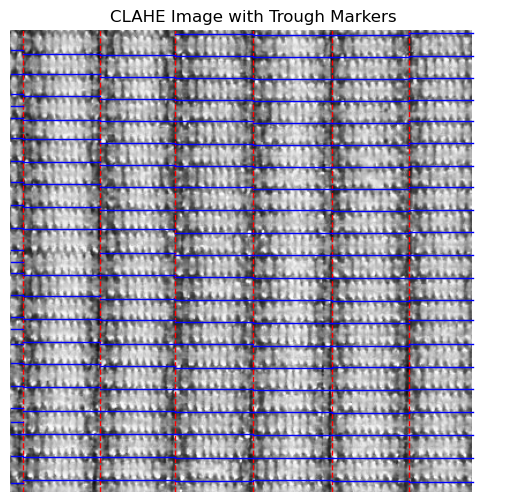

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,savgol_filter

# Read and crop the image
img = cv2.imread('../image/img_03.tif')[200:600, 200:600]
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_gray)

# Compute mean intensity per column
column_means_clahe = np.mean(img_clahe, axis=0)

# Find troughs
split_troughs, _ = find_peaks(-column_means_clahe, prominence=5, distance=10, height=-155)
s_p = np.concatenate(([0], split_troughs, [img_clahe.shape[1]]))

median_troughs_array = []  
for i in range(len(split_points) - 1):
    median_values = np.median(img_clahe[:, split_points[i]:split_points[i + 1]], axis=1)
    sg_medians = savgol_filter(median_values, window_length=12, polyorder=2)
    troughs, _ = find_peaks(-sg_medians, distance=10, height=-155)
    median_troughs_array.append(troughs)


# Plot image and vertical lines at split points
plt.figure(figsize=(10, 6))
plt.imshow(img_clahe, cmap='gray')

for x in split_troughs:
    plt.axvline(x=x, color='red', linestyle='--', linewidth=1)

for i, median_troughs in enumerate(median_troughs_array):
    for median in median_troughs:
        plt.plot([split_points[i], split_points[i + 1]], [median, median], color='blue', linestyle='-', linewidth=1)

plt.title('CLAHE Image with Trough Markers')
plt.axis('off')
plt.show()


In [88]:
median_troughs_array

[array([ 17,  38,  55,  65,  76,  93, 113, 131, 151, 171, 190, 200, 210,
        229, 248, 258, 271, 288, 308, 327, 339, 349, 368, 392], dtype=int64),
 array([ 20,  38,  57,  77,  94, 114, 133, 153, 172, 212, 230, 250, 270,
        289, 309, 329, 349, 369, 389], dtype=int64),
 array([ 21,  40,  59,  78,  97, 116, 135, 155, 172, 193, 212, 232, 251,
        271, 290, 310, 329, 349, 369, 389], dtype=int64),
 array([  3,  22,  41,  60,  78,  98, 117, 135, 155, 175, 194, 213, 233,
        252, 271, 292, 310, 330, 349, 370, 390], dtype=int64),
 array([  4,  23,  42,  61,  80,  99, 118, 137, 155, 175, 194, 214, 233,
        253, 273, 292, 311, 330, 350, 370, 389], dtype=int64),
 array([  4,  23,  42,  61,  80,  99, 118, 137, 156, 175, 194, 214, 234,
        253, 273, 291, 311, 331, 350, 370, 390], dtype=int64),
 array([  2,  22,  41,  60,  78,  97, 117, 135, 155, 174, 194, 214, 233,
        251, 271, 291, 310, 330, 350, 370, 391], dtype=int64)]